In [166]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [167]:
csv_path = 'data/VPA_Open_Space.csv'

read_csv = pd.read_csv(csv_path)

information_df = pd.DataFrame(read_csv)

information_df.head()

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
0,1,BOROONDARA,3\LP28215,95086,VM Features of Interest,Tertiary institutions,Not applicable,State Government,Swinburne University Of Technology & Tafe Divi...,Existing,...,,,Restricted public land,,NO DATA,Swinburne University of Technology,https://lh3.googleusercontent.com/-QP2NylEZuhE...,1500,0.000742,1.698581e-08
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08


In [168]:
park_query = ['State Government', 'Local government']

information_df_parks_df = information_df.loc[(information_df['OS_TYPE'] == 'Public open space')]
information_df_parks_df.head()

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08
6,7,BOROONDARA,186\LP5481,203971959,VM Parcels,Sportsfields and organised recreation,Not applicable,Local government,Jack Otoole Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-IeXcYfXdodo...,1506,0.001080,5.251028e-08


In [169]:
information_df_parks_df['LGA'].value_counts()

YARRA RANGES         2376
CASEY                1853
MORNINGTON           1839
HUME                 1333
WHITTLESEA           1316
CARDINIA             1287
FRANKSTON            1166
WYNDHAM              1056
MELTON               1055
NILLUMBIK            1007
BRIMBANK              986
KNOX                  862
WHITEHORSE            811
MORELAND              809
MANNINGHAM            736
KINGSTON              690
MAROONDAH             660
GREATER DANDENONG     626
BANYULE               625
BOROONDARA            576
MELBOURNE             549
MONASH                549
MOONEE VALLEY         526
DAREBIN               513
HOBSONS BAY           422
MARIBYRNONG           307
PORT PHILLIP          295
YARRA                 275
STONNINGTON           214
GLEN EIRA             160
BAYSIDE               131
MITCHELL               80
Name: LGA, dtype: int64

In [170]:
lga_list = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False).index)
lga_list

lga_bucket = []

for i in range(len(lga_list)):
    lga_bucket.append(str(lga_list['LGA'][i].title()))
    
lga_bucket

['Yarra Ranges',
 'Casey',
 'Mornington',
 'Hume',
 'Whittlesea',
 'Cardinia',
 'Frankston',
 'Wyndham',
 'Melton',
 'Nillumbik',
 'Brimbank',
 'Knox',
 'Whitehorse',
 'Moreland',
 'Manningham',
 'Kingston',
 'Maroondah',
 'Greater Dandenong',
 'Banyule',
 'Boroondara',
 'Melbourne',
 'Monash',
 'Moonee Valley',
 'Darebin',
 'Hobsons Bay',
 'Maribyrnong',
 'Port Phillip',
 'Yarra',
 'Stonnington',
 'Glen Eira',
 'Bayside',
 'Mitchell']

In [171]:
lga_park_count = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False))
lga_park_count = lga_park_count['PARK_NAME'].reset_index('LGA')
lga_park_count

park_count = []

for i in range(len(lga_park_count)):
    park_count.append(int(lga_park_count['PARK_NAME'][i]))
    
park_count

[2376,
 1853,
 1819,
 1333,
 1316,
 1287,
 1166,
 1056,
 1055,
 1007,
 986,
 862,
 811,
 809,
 736,
 690,
 660,
 626,
 625,
 576,
 549,
 549,
 526,
 513,
 422,
 307,
 295,
 275,
 214,
 160,
 131,
 80]

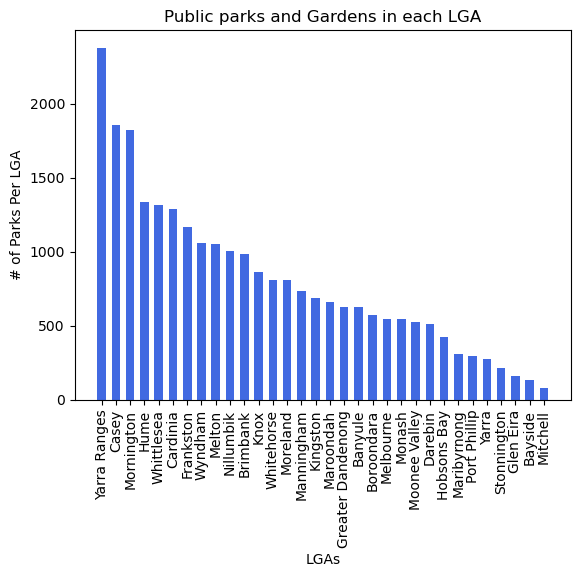

In [172]:
x_axis = np.arange(len(lga_bucket))

plt.bar(x_axis, park_count, color="royalblue", align="center", width = 0.6)
tick_locations = [value for value in x_axis]
tick_locations
plt.xticks(tick_locations, lga_bucket, rotation = 90)
plt.xlabel('LGAs')
plt.ylabel('# of Parks Per LGA')
plt.title('Public parks and Gardens in each LGA')

plt.show()

In [173]:
lga_park_count_df = pd.DataFrame({"Local Government Area" : lga_bucket, 
                                  "Public Open Spaces" : park_count})
lga_park_count_df

,Local Government Area,Public Open Spaces
0,Yarra Ranges,2376
1,Casey,1853
2,Mornington,1819
3,Hume,1333
4,Whittlesea,1316
5,Cardinia,1287
6,Frankston,1166
7,Wyndham,1056
8,Melton,1055
9,Nillumbik,1007


In [174]:
column_names = ['LGA code', 'Local Government Area', '2021 Population', 
                '2022 Population', '% Population Change 21-22', 'Area (km2)', 
                'Population Density (persons/km2)'
            ]

lga_information_path = pd.read_excel('data/LGA_ABS_data_21_22.xlsx', 
                                     sheet_name = 2, 
                                     header = 7,
                                     names = column_names,
                                     usecols = 'A,B,C,D,G,M,N',
                                     skiprows = 1,
                                     na_values = 0)
lga_information = pd.DataFrame(lga_information_path)
lga_information

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,NaN,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
work_bucket = []
change_search = range(len(lga_information['% Population Change 21-22']))

for i in change_search:
    
    work_bucket.append(lga_information['% Population Change 21-22'][i])

work_bucket = pd.Series(work_bucket, dtype=object).fillna(0).tolist()

lga_information['% Population Change 21-22'] = work_bucket
    

In [176]:
lga_information

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,0.0,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,0.0,NaN,NaN
84,NaN,NaN,NaN,NaN,0.0,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,0.0,NaN,NaN
86,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [177]:
lga_information_cleaned = lga_information.dropna(how = 'any')
lga_information_cleaned

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13166.0,13187.0,0.2,4788.2,2.8
1,20260,Ararat,11827.0,11754.0,-0.6,4211.1,2.8
2,20570,Ballarat,113504.0,115951.0,2.2,739.0,156.9
3,20660,Banyule,127370.0,127348.0,0.0,62.5,2036.3
4,20740,Bass Coast,40675.0,41798.0,2.8,865.8,48.3
...,...,...,...,...,...,...,...
75,27260,Wyndham,296322.0,309125.0,4.3,542.1,570.2
76,27350,Yarra,91521.0,92301.0,0.9,19.5,4723.2
77,27450,Yarra Ranges,157421.0,157388.0,0.0,2468.2,63.8
78,27630,Yarriambiack,6510.0,6435.0,-1.2,7325.8,0.9


In [178]:
lga_filtered = lga_information_cleaned.loc[lga_information_cleaned['Local Government Area'].isin(lga_bucket)]
lga_filtered = lga_filtered.reset_index(drop = True)
len(lga_information)

88

In [179]:
merged_vic_data_df = pd.merge(lga_filtered, lga_park_count_df, how = 'inner', on = 'Local Government Area')
merged_vic_data_df.to_csv('data/merged_vic_data.csv')

In [180]:
type(merged_vic_data_df['Local Government Area'][0])

str

In [181]:
merged_vic_data_df.sort_values(by = ['Local Government Area'] ,ascending = True)

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces
0,20660,Banyule,127370.0,127348.0,0.0,62.5,2036.3,625
1,21110,Boroondara,169789.0,169500.0,-0.2,60.2,2816.7,576
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986
3,21450,Cardinia,119573.0,123104.0,3.0,1282.6,96.0,1287
4,21610,Casey,369558.0,378831.0,2.5,409.4,925.3,1853
5,21890,Darebin,150296.0,150483.0,0.1,53.5,2814.3,513
6,22170,Frankston,140824.0,141078.0,0.2,129.6,1088.6,1166
7,22310,Glen Eira,150638.0,151694.0,0.7,38.7,3920.7,160
8,22670,Greater Dandenong,160100.0,159151.0,-0.6,129.5,1228.5,626
9,23110,Hobsons Bay,92267.0,91803.0,-0.5,64.2,1429.1,422


In [182]:
school_csv_path = 'data/dv309_schoollocations2021.csv'

school_read_csv = pd.read_csv(school_csv_path, encoding = 'cp1252')

school_count_df = pd.DataFrame(school_read_csv)
school_count_df.head()

,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [183]:
school_count_df['LGA_Name'] = school_count_df['LGA_Name'].str.replace(r"\(.*\)", "")
school_count_df['LGA_Name'] = school_count_df['LGA_Name'].str.replace(r" ", "")
school_count_df.head()

c:\Users\anups\anaconda3\envs\dev0\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington,146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool,142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees,143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie,145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham,145.213980,-37.742675


In [184]:
school_count_df['LGA_Name'][1]

'Warrnambool'

In [185]:
school_count_df_filtered = school_count_df.loc[school_count_df['LGA_Name'].isin(merged_vic_data_df['Local Government Area'])]

In [186]:
by_school_type_df = school_count_df_filtered.groupby(['LGA_Name', 'School_Type'])['SCHOOL_NO'].count()
school_type_df = pd.DataFrame(by_school_type_df)
school_type_df

SCHOOL_NO
LGA_Name   School_Type           
Banyule    Pri/Sec              3
           Primary             29
           Secondary            8
           Special              3
Boroondara Pri/Sec             13
...                           ...
Yarra      Language             1
           Pri/Sec              3
           Primary             18
           Secondary            7
           Special              1

[93 rows x 1 columns]

In [187]:
school_type_df = school_type_df.reset_index(inplace = False)
school_type_df

,LGA_Name,School_Type,SCHOOL_NO
0,Banyule,Pri/Sec,3
1,Banyule,Primary,29
2,Banyule,Secondary,8
3,Banyule,Special,3
4,Boroondara,Pri/Sec,13
...,...,...,...
88,Yarra,Language,1
89,Yarra,Pri/Sec,3
90,Yarra,Primary,18
91,Yarra,Secondary,7


In [188]:
school_range = range(len(school_type_df['School_Type'].unique()))

school_types = []

for i in school_range:
    school_types.append(school_type_df['School_Type'].unique()[i])

school_types

['Pri/Sec', 'Primary', 'Secondary', 'Special', 'Language']

In [189]:
school_search_len = range(len(school_types))

dictionary_list = [{} for i in school_search_len]

dictionary_list

[{}, {}, {}, {}, {}]

In [190]:
search_df = school_type_df.loc[school_type_df['School_Type'] == 'Pri/Sec'].reset_index(drop = True)
search_df

,LGA_Name,School_Type,SCHOOL_NO
0,Banyule,Pri/Sec,3
1,Boroondara,Pri/Sec,13
2,Brimbank,Pri/Sec,1
3,Cardinia,Pri/Sec,3
4,Casey,Pri/Sec,9
5,Darebin,Pri/Sec,5
6,Frankston,Pri/Sec,2
7,Hume,Pri/Sec,7
8,Knox,Pri/Sec,4
9,Manningham,Pri/Sec,1


In [191]:
school_search_len = range(len(school_types))

counter = 0

for i in school_search_len:

    search_df = school_type_df.loc[school_type_df['School_Type'] == school_types[i]].reset_index(drop = True)

    for j in range(len(search_df['LGA_Name'])):

        dictionary_list[counter][search_df['LGA_Name'][j]] = search_df['SCHOOL_NO'][j]

    counter += 1

In [192]:
primary_secondary_counts = dictionary_list[0]
primary_counts = dictionary_list[1]
secondary_counts = dictionary_list[2]
special_counts = dictionary_list[3]
language_counts = dictionary_list[4]

In [193]:
prisec_df = pd.Series(primary_secondary_counts, name = 'Primary/Secondary Schools')

prisec_df = pd.DataFrame(prisec_df).reset_index(drop = False)

prisec_df = prisec_df.rename(columns= {'index' : 'Local Government Area'})

prisec_df['Primary/Secondary Schools'] = prisec_df['Primary/Secondary Schools'].astype(int)

prisec_df

,Local Government Area,Primary/Secondary Schools
0,Banyule,3
1,Boroondara,13
2,Brimbank,1
3,Cardinia,3
4,Casey,9
5,Darebin,5
6,Frankston,2
7,Hume,7
8,Knox,4
9,Manningham,1


In [194]:
pri_df = pd.Series(primary_counts, name = 'Primary Schools')

pri_df = pd.DataFrame(pri_df).reset_index(drop = False)

pri_df = pri_df.rename(columns= {'index' : 'Local Government Area'})

pri_df['Primary Schools'] = pri_df['Primary Schools'].astype(int)

pri_df


,Local Government Area,Primary Schools
0,Banyule,29
1,Boroondara,31
2,Brimbank,45
3,Cardinia,28
4,Casey,59
5,Darebin,30
6,Frankston,28
7,Hume,43
8,Knox,36
9,Manningham,22


In [195]:

sec_df = pd.Series(secondary_counts, name = 'Secondary Schools')

sec_df = pd.DataFrame(sec_df).reset_index(drop = False)

sec_df = sec_df.rename(columns= {'index' : 'Local Government Area'})

sec_df['Secondary Schools'] = sec_df['Secondary Schools'].astype(int)

type(sec_df['Secondary Schools'][0])


numpy.int32

In [196]:
spec_df = pd.Series(special_counts, name = 'Special Schools')

spec_df = pd.DataFrame(spec_df).reset_index(drop = False)

spec_df = spec_df.rename(columns= {'index' : 'Local Government Area'})

spec_df['Special Schools'] = spec_df['Special Schools'].astype(int)

spec_df

,Local Government Area,Special Schools
0,Banyule,3
1,Boroondara,5
2,Brimbank,3
3,Cardinia,1
4,Casey,2
5,Darebin,4
6,Frankston,3
7,Hume,4
8,Knox,2
9,Manningham,2


In [197]:
lang_df = pd.Series(language_counts, name = 'Language Schools')

lang_df = pd.DataFrame(lang_df).reset_index(drop = False)

lang_df = lang_df.rename(columns= {'index' : 'Local Government Area'})

lang_df['Language Schools'] = lang_df['Language Schools'].astype(int)

lang_df

,Local Government Area,Language Schools
0,Maribyrnong,1
1,Whitehorse,1
2,Yarra,1


In [198]:
spec_df, sec_df, pri_df, prisec_df, lang_df

(   Local Government Area  Special Schools
 0                Banyule                3
 1             Boroondara                5
 2               Brimbank                3
 3               Cardinia                1
 4                  Casey                2
 5                Darebin                4
 6              Frankston                3
 7                   Hume                4
 8                   Knox                2
 9             Manningham                2
 10           Maribyrnong                2
 11             Maroondah                1
 12             Melbourne                7
 13                Melton                1
 14                Monash                6
 15              Moreland                2
 16             Nillumbik                1
 17           Stonnington                2
 18            Whitehorse                4
 19            Whittlesea                1
 20               Wyndham                1
 21                 Yarra                1,
    Local 

In [199]:
merged_vic_data_df = pd.merge(merged_vic_data_df, prisec_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, pri_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, sec_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, spec_df, how = 'outer', on = 'Local Government Area')
merged_vic_data_df = pd.merge(merged_vic_data_df, lang_df, how = 'outer', on = 'Local Government Area')

In [200]:
merged_vic_data_df.fillna(value = 0.0)

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Primary/Secondary Schools,Primary Schools,Secondary Schools,Special Schools,Language Schools
0,20660,Banyule,127370.0,127348.0,0.0,62.5,2036.3,625,3.0,29.0,8.0,3.0,0.0
1,21110,Boroondara,169789.0,169500.0,-0.2,60.2,2816.7,576,13.0,31.0,9.0,5.0,0.0
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986,1.0,45.0,10.0,3.0,0.0
3,21450,Cardinia,119573.0,123104.0,3.0,1282.6,96.0,1287,3.0,28.0,6.0,1.0,0.0
4,21610,Casey,369558.0,378831.0,2.5,409.4,925.3,1853,9.0,59.0,13.0,2.0,0.0
5,21890,Darebin,150296.0,150483.0,0.1,53.5,2814.3,513,5.0,30.0,7.0,4.0,0.0
6,22170,Frankston,140824.0,141078.0,0.2,129.6,1088.6,1166,2.0,28.0,8.0,3.0,0.0
7,22310,Glen Eira,150638.0,151694.0,0.7,38.7,3920.7,160,0.0,0.0,0.0,0.0,0.0
8,22670,Greater Dandenong,160100.0,159151.0,-0.6,129.5,1228.5,626,0.0,0.0,0.0,0.0,0.0
9,23110,Hobsons Bay,92267.0,91803.0,-0.5,64.2,1429.1,422,0.0,0.0,0.0,0.0,0.0


In [201]:
merged_vic_data_df['Primary/Secondary Schools'] = np.int64(merged_vic_data_df['Primary/Secondary Schools'])
merged_vic_data_df['Primary Schools'] = np.int64(merged_vic_data_df['Primary Schools'])
merged_vic_data_df['Secondary Schools'] = np.int64(merged_vic_data_df['Secondary Schools'])
merged_vic_data_df['Special Schools'] = np.int64(merged_vic_data_df['Special Schools'])
merged_vic_data_df['Language Schools'] = np.int64(merged_vic_data_df['Language Schools'])


In [202]:
merged_vic_data_df

,LGA code,Local Government Area,2021 Population,2022 Population,% Population Change 21-22,Area (km2),Population Density (persons/km2),Public Open Spaces,Primary/Secondary Schools,Primary Schools,Secondary Schools,Special Schools,Language Schools
0,20660,Banyule,127370.0,127348.0,0.0,62.5,2036.3,625,3,29,8,3,-9223372036854775808
1,21110,Boroondara,169789.0,169500.0,-0.2,60.2,2816.7,576,13,31,9,5,-9223372036854775808
2,21180,Brimbank,196631.0,193256.0,-1.7,123.4,1566.1,986,1,45,10,3,-9223372036854775808
3,21450,Cardinia,119573.0,123104.0,3.0,1282.6,96.0,1287,3,28,6,1,-9223372036854775808
4,21610,Casey,369558.0,378831.0,2.5,409.4,925.3,1853,9,59,13,2,-9223372036854775808
5,21890,Darebin,150296.0,150483.0,0.1,53.5,2814.3,513,5,30,7,4,-9223372036854775808
6,22170,Frankston,140824.0,141078.0,0.2,129.6,1088.6,1166,2,28,8,3,-9223372036854775808
7,22310,Glen Eira,150638.0,151694.0,0.7,38.7,3920.7,160,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
8,22670,Greater Dandenong,160100.0,159151.0,-0.6,129.5,1228.5,626,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
9,23110,Hobsons Bay,92267.0,91803.0,-0.5,64.2,1429.1,422,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808


In [ ]:
modify_bucket = []
search_range = range(len(merged_vic_data_df['Primary/Secondary Schools']))

for i in 